# Predicting Blood Donation for Future Expectancy

Forecasting blood supply is a serious and recurrent problem for blood collection managers: in January 2019, "Nationwide, the Red Cross saw 27,000 fewer blood donations over the holidays than they see at other times of the year."
Machine learning can be used to learn the patterns in the data to help to predict future blood donations and therefore save more lives.

In this Project, I will work with data collected from the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes its blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. The dataset, obtained from the UCI Machine Learning Repository, consists of a random sample of 748 donors. My task will be to predict if a blood donor will donate within a given time window. I will look at the full model-building process: from inspecting the dataset to using the tpot library to automate my Machine Learning pipeline.

# 1. Inspecting transfusion.data file

This dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. I want to predict whether or not a donor will give blood the next time the vehicle comes to campus.              

The data is stored in transfusion/transfusion.data and it is structured according to RFMTC marketing model (a variation of RFM).

In [1]:
#import numpy and pandas as np and pd respectively
import numpy as np
import pandas as pd


In [2]:
#define path form the data file
path = 'transfusion/transfusion.data'

In [3]:
#print only 5 lines from the file
i = 0
with open(path) as in_file:
    for line in in_file:
        if i != 6:
            print(line)
            i += 1 
            
        
        

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"

2 ,50,12500,98 ,1

0 ,13,3250,28 ,1

1 ,16,4000,35 ,1

2 ,20,5000,45 ,1

1 ,24,6000,77 ,0



# 2. Loading the blood donations data

Loading the data into memory.

In [4]:
#read data in pandas dataframe data
data = pd.read_csv(path)

# 3. Inspecting transfusion DataFrame

RFMTC is a variation of the RFM model. Below is a description of what each column means in this dataset:

R (Recency - months since the last donation)                                             
F (Frequency - total number of donation)                                        
M (Monetary - total blood donated in c.c.)                                       
T (Time - months since the first donation)                                             

a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

It looks like every column in this DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify this hypothesis.

In [5]:
#display only 5 head lines in the dataset
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
#inspect information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
#description of the data
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# 4. Creating target column

In [8]:
#create column target in data frame
data['target'] = data['whether he/she donated blood in March 2007']

In [9]:
#drop the copied column
data = data.drop('whether he/she donated blood in March 2007', axis = 1)

In [10]:
#inspect the altered data 
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 5. Checking target incidence

I want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:     

0 - the donor will not give blood                                       
1 - the donor will give blood

In [11]:
#inspect the unique values in the target column
data.target.unique()

array([1, 0], dtype=int64)

In [12]:
#calculate the normalized ratio of unique values present in the target column
data.target.value_counts(normalize = True)

0    0.762032
1    0.237968
Name: target, dtype: float64

Text(0.5, 15.0, 'RFMT')

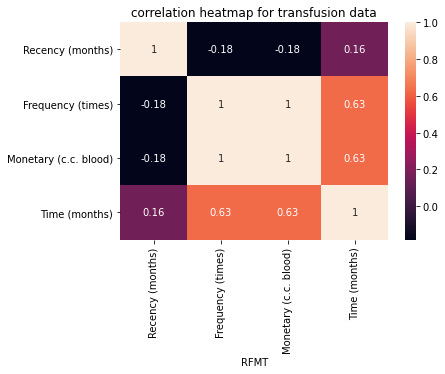

In [13]:
#import seaborn and matplotlib.pyplot as sns and plt respectively
import seaborn as sns
import matplotlib.pyplot as plt

#drop the target column
mat = data.drop(columns='target', axis = 1)

#correlation matrix
correlation_mat = mat.corr()

#heat map plot
sns.heatmap(correlation_mat, annot = True)
plt.title('correlation heatmap for transfusion data')
plt.xlabel('RFMT')

# 6. Splitting transfusion into train and test datasets

I'll now use train_test_split() method to split transfusion DataFrame.
Target incidence informed that in this dataset 0s appear 76% of the time. I want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the train_test_split() method from the scikit learn library - all I need to do is specify the stratify parameter. In this case, I'll stratify on the target column.

In [14]:
#import train_test_split 
from sklearn.model_selection import train_test_split

In [15]:
#split the data with stratification on target column
train_x, test_x, train_y, test_y = train_test_split(    data.drop(columns='target'),
                                                        data.target, test_size=0.25,
                                                        random_state=42, stratify=data.target)

In [16]:
#inspect the head of the train data
train_x.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


In [17]:
#inspect the head of target of train data
train_y.head()

334    0
99     1
116    1
661    0
154    0
Name: target, dtype: int64

# 7. Selecting model using TPOT

TPOT is an open-source library for performing AutoML in Python. It makes use of the popular Scikit-Learn machine learning library for data transforms and machine learning algorithms and uses a Genetic Programming stochastic global search procedure to efficiently discover a top-performing model pipeline for a given dataset.

In [18]:
#import TPOTClassifier
from tpot import TPOTClassifier

#import roc_auc_score
from sklearn.metrics import roc_auc_score

C:\Users\Rekha\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [19]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier( generations=5, 
                       population_size=20, 
                       verbosity=2, 
                       scoring='roc_auc',
                       random_state=42,
                       disable_update_check=True,
                       config_dict='TPOT light'
                      )
tpot.fit(train_x, train_y)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(test_y, tpot.predict_proba(test_x)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.3f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)

AUC score: 0.764

Best pipeline steps:
1. Normalizer()
2. MultinomialNB(alpha=0.001)


# 8. Checking the variance

TPOT picked LogisticRegression as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.764. This is a great starting point. Let's see if it can be better.

One of the assumptions for linear regression models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.

In [23]:
#find the variance of train data
train_x.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

In [24]:
test_x.var().round(3)

Recency (months)              61.692
Frequency (times)             34.887
Monetary (c.c. blood)    2180416.595
Time (months)                533.939
dtype: float64

# 9. Normalization

Here we, will normalize the data as the tpot model suggested.

In [25]:
from sklearn.preprocessing import Normalizer

In [26]:
transformer = Normalizer().fit(train_x)

In [27]:
X_train_normed = transformer.transform(train_x)

In [28]:
X_test_normed = transformer.transform(test_x)

In [31]:
train_x_normed, test_x_normed = X_train_normed.copy(), X_test_normed.copy()

# add column names to the normalized data
train_x_normed = pd.DataFrame(train_x_normed, columns = train_x.columns)
test_x_normed = pd.DataFrame(test_x_normed, columns = test_x.columns)

In [32]:
[train_x_normed, test_x_normed]

[     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
 0            0.031967           0.003996               0.998970       0.031967
 1            0.002857           0.004000               0.999878       0.014855
 2            0.001142           0.003999               0.999646       0.026276
 3            0.031967           0.003996               0.998970       0.031967
 4            0.007999           0.004000               0.999928       0.007999
 ..                ...                ...                    ...            ...
 556          0.014590           0.003979               0.994791       0.100806
 557          0.014647           0.003995               0.998670       0.049268
 558          0.000571           0.004000               0.999898       0.013713
 559          0.018619           0.003990               0.997424       0.069155
 560          0.015994           0.003998               0.999600       0.022991
 
 [561 rows x 4 columns],
      Recency

In [34]:
# Check the variance for X_train_normed
train_x_normed.var().round(5)

Recency (months)         0.00070
Frequency (times)        0.00000
Monetary (c.c. blood)    0.00002
Time (months)            0.00082
dtype: float64

In [49]:
train_x_normed.shape

(561, 4)

# 10. Training the MultinominalNB model

The variance looks much better now. Notice that now Time (months) has the largest variance, but it's not the orders of magnitude higher than the rest of the variables, so we'll leave it as is.

We are now ready to train the linear regression model.

In [35]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB(alpha = 0.001)
clf_nb.fit(train_x_normed, train_y)

MultinomialNB(alpha=0.001)

In [38]:
clf_nb.predict(test_x_normed)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
# AUC score for tpot suggested model
MNB_auc_score = roc_auc_score(test_y, clf_nb.predict_proba(test_x_normed)[:, 1])
print(f'\nAUC score: {MNB_auc_score:.5f}')


AUC score: 0.76375


# 11. Conclusion

In this notebook, I explored automatic model selection using TPOT and AUC score we got was 0.764. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 2.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (target) can be explained by other variables in our dataset.

# Saving this model

In [41]:
import pickle 

In [42]:
#saving the model
with open('model.pkl','wb') as f_out:
    pickle.dump(clf_nb, f_out)
    f_out.close()

In [43]:
with open('model_normalizer.pkl','wb') as fn_out:
    pickle.dump(transformer, fn_out)
    f_out.close()

In [45]:
#loading the model from saved file
with open('model.pkl','rb') as f_in:
    model = pickle.load(f_in)
auc_score = roc_auc_score(test_y, model.predict_proba(test_x_normed)[:, 1])
print(f'\nAUC score: {auc_score:.5f}')    


AUC score: 0.76375
